In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import os

In [2]:
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data')
df = pd.read_excel('facemasks_data_20200531.xlsx') 
df=df.drop(['地域', '業態','対象店舗数','営業日数','登録日','最新売上日','大分類名', '大分類コード', 
            '小分類名', '小分類コード','１日当り金額', '１日当り個数', '１日当り容量', '出現店１日金額',
            '出現店１日個数','出現店１日容量','出現店販売日数','出現店千人金額', '出現店千人個数', 
            '出現店千人容量', '１店当り金額','１店当り個数', '１店当り容量', '出現店１店金額', '出現店１店個数', 
            '出現店１店容量','カバー率', '加重カバー率', '出現店来店客数', '販売店舗数','Unnamed: 51', 'Unnamed: 52'], axis = 1)
df['date'] = df['年月日'].apply(lambda x: x.strftime('%Y-%m-%d'))
df["販売容量ALL"] = df["販売容量"] + df["特売販売容量"]
df_daily_sale = df.groupby('date').sum()['販売容量ALL'].reset_index()

# 1 The Peak of Sales

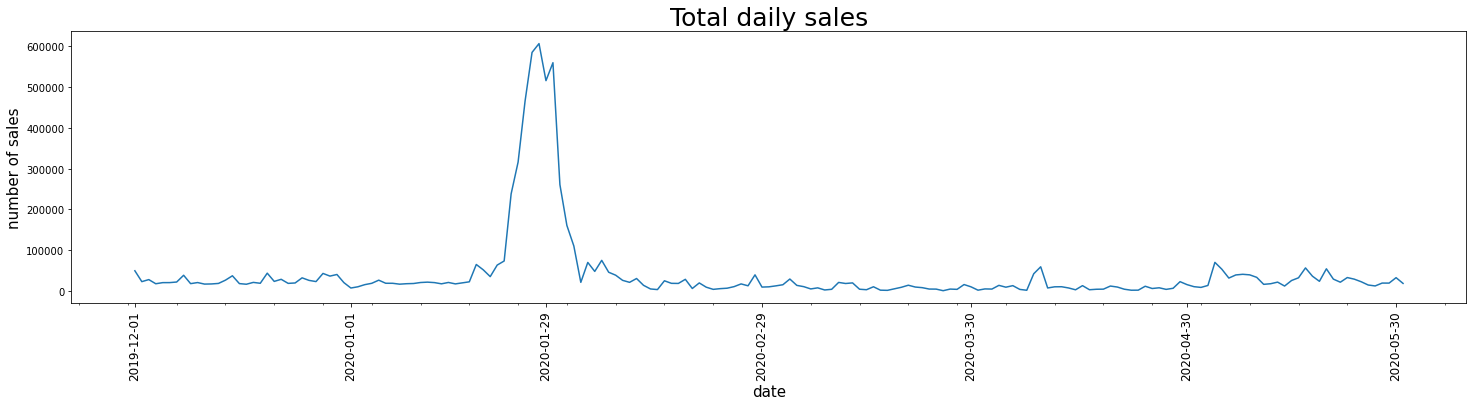

In [3]:
df_daily_sale = df.groupby('date').sum()['販売容量ALL'].reset_index()

fig, ax = plt.subplots(figsize=(25,5))

plt.plot(df_daily_sale['date'], df_daily_sale['販売容量ALL'])
plt.xticks(rotation='vertical', size=12)
plt.xlabel('date', size=15)
plt.ylabel('number of sales', size=15)
plt.title('Total daily sales', size=25)

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)

fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

In [4]:
df_daily_sale.mean()  

販売容量ALL    40022.918033
dtype: float64

In [5]:
df_daily_sale.std()  

販売容量ALL    93415.395198
dtype: float64

In [6]:
# Here, we label days with sales higher than 1.5 times the average sales.
def spike(row):
    if row['販売容量ALL'] >= (40022.918*1.5):
        val = '1'
    else:
        val = '0'
    return val
df_daily_sale['spike'] = df_daily_sale.apply(spike, axis=1)

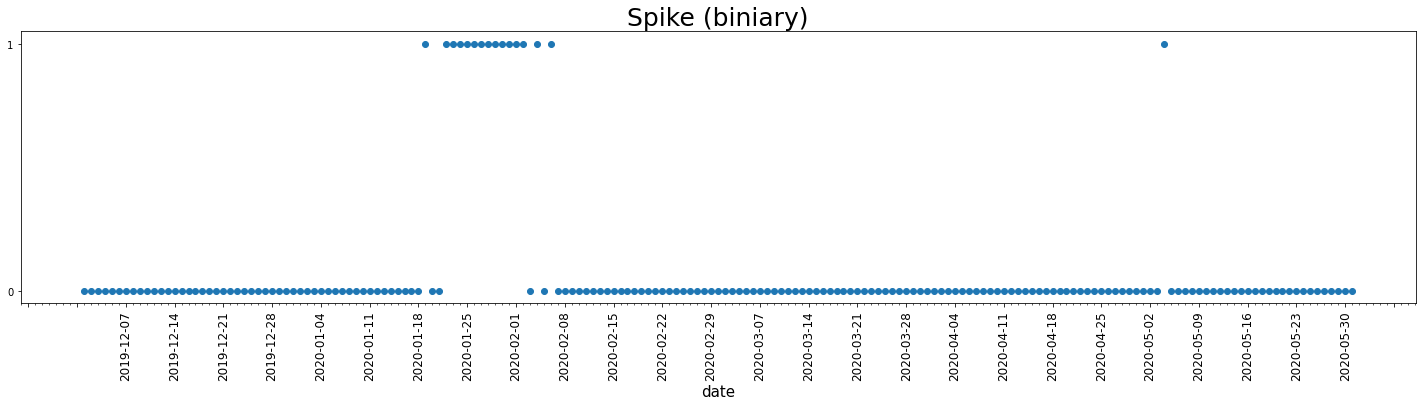

In [7]:
# Setting the figure size
fig, ax = plt.subplots(figsize=(25,5))

# Plotting the binary variable "peak"
plt.plot(df_daily_sale['date'], df_daily_sale['spike'], 'o')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('date', size=15)
plt.title('Spike (biniary)', size=25)
fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 2 Daily Sales per Customer

In [8]:
df_daily_customer = df.groupby('date').mean()['来店客数'].reset_index()
df_daily_sale = pd.concat([df_daily_sale, df_daily_customer['来店客数']], axis=1)
df_daily_sale['sale_pp'] = df_daily_sale['販売容量ALL'] / df_daily_sale['来店客数']

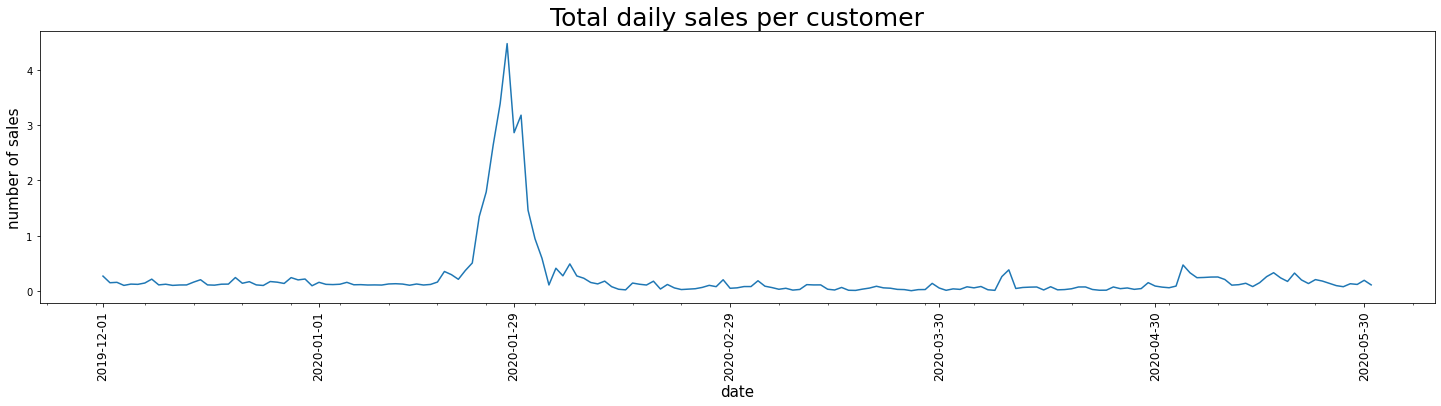

In [9]:
# Setting the figure size
fig, ax = plt.subplots(figsize=(25,5))

# Plotting sales data
plt.plot(df_daily_sale['date'], df_daily_sale['sale_pp'])
plt.xticks(rotation='vertical', size=12)
plt.xlabel('date', size=15)
plt.ylabel('number of sales', size=15)
plt.title('Total daily sales per customer', size=25)
fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 3 Daily Sales by Materials

In [10]:
# checking and outputting all unique product names
df_name = pd.DataFrame(df['商　品　名'].unique())

In [11]:
# Create columns for each material
def material(row):
    if 'シート' in row['商　品　名']:
        val = 'protective sheet'
    elif 'ガーゼ'in row['商　品　名'] or '給食'in row['商　品　名'] or'ショウワ'in row['商　品　名']:
        val = 'gauze'
    elif 'シルク'in row['商　品　名'] or 'アルファックス'in row['商　品　名']or'コットン'in row['商　品　名']or'立体布'in row['商　品　名']:
        val = 'cloth'
    elif '温感'in row['商　品　名']or'蒸気'in row['商　品　名']or'潤い'in row['商　品　名']or'のどぬーる'in row['商　品　名']or'美肌'in row['商　品　名']:
        val = 'heating/moisturizing'
    elif 'アラクス'in row['商　品　名']or'プロダクトＩ'in row['商　品　名']or'フロンティア'in row['商　品　名']:
        val = 'urethane'
    elif '不織布'in row['商　品　名']or'サージカル'in row['商　品　名']or'ＴＨＴ'in row['商　品　名']or'バンダイ'in row['商　品　名']or'ＤＲ．Ｃ'in row['商　品　名']or'Ｉオーヤマ'in row['商　品　名']or'Ｎ＆Ｎコーポ'in row['商　品　名']or'ＹＡＹＡ'in row['商　品　名']or'アズフィット'in row['商　品　名']or'イオンＴＶ'in row['商　品　名']or'エスパック'in row['商　品　名']or'サラヤ'in row['商　品　名']or'サンエイ'in row['商　品　名']or'システムポリマ'in row['商　品　名']or'スケーター'in row['商　品　名']or'スズラン'in row['商　品　名']or'チャーム'in row['商　品　名']or'トレードワン'in row['商　品　名']or'ネピア'in row['商　品　名']or'バイリーン'in row['商　品　名']or'パッショーネ'in row['商　品　名']or'ハピネット'in row['商　品　名']or'ビーエムシー'in row['商　品　名']or'ピエラス'in row['商　品　名']or'ピジョン'in row['商　品　名']or'ピップ'in row['商　品　名']or'メディカルＪ'in row['商　品　名']or'メディコム'in row['商　品　名']or'ヨコイ'in row['商　品　名']or'リブラボ'in row['商　品　名']or'八社会'in row['商　品　名']or'白十字'in row['商　品　名']or'白元'in row['商　品　名']or'大三'in row['商　品　名']or'東京企画'in row['商　品　名']or'横井定'in row['商　品　名']or'紀陽除虫菊'in row['商　品　名']or'近江兄弟'in row['商　品　名']or'柳瀬'in row['商　品　名']or'日本ＰＤＩ'in row['商　品　名']or'森川'in row['商　品　名']or'小久保'in row['商　品　名']or'玉川'in row['商　品　名']or'興和'in row['商　品　名']or'原田産業'in row['商　品　名']or'トレードワーク'in row['商　品　名']or'大王'in row['商　品　名']:
        val = 'nonwoven'
    else:
        val = 'NULL'
    return val
df['material'] = df.apply(material, axis=1)

In [12]:
# Daily sales of each material 
df_m = df.groupby(['date', 'material'])['販売容量ALL'].sum()
df_m = df_m.unstack(level=0)
df_m = df_m.fillna(0)
df_m = df_m.T
df_m['total'] = df_m[list(df_m.columns)].sum(axis=1)
df_m.reset_index(level=0, inplace=True)

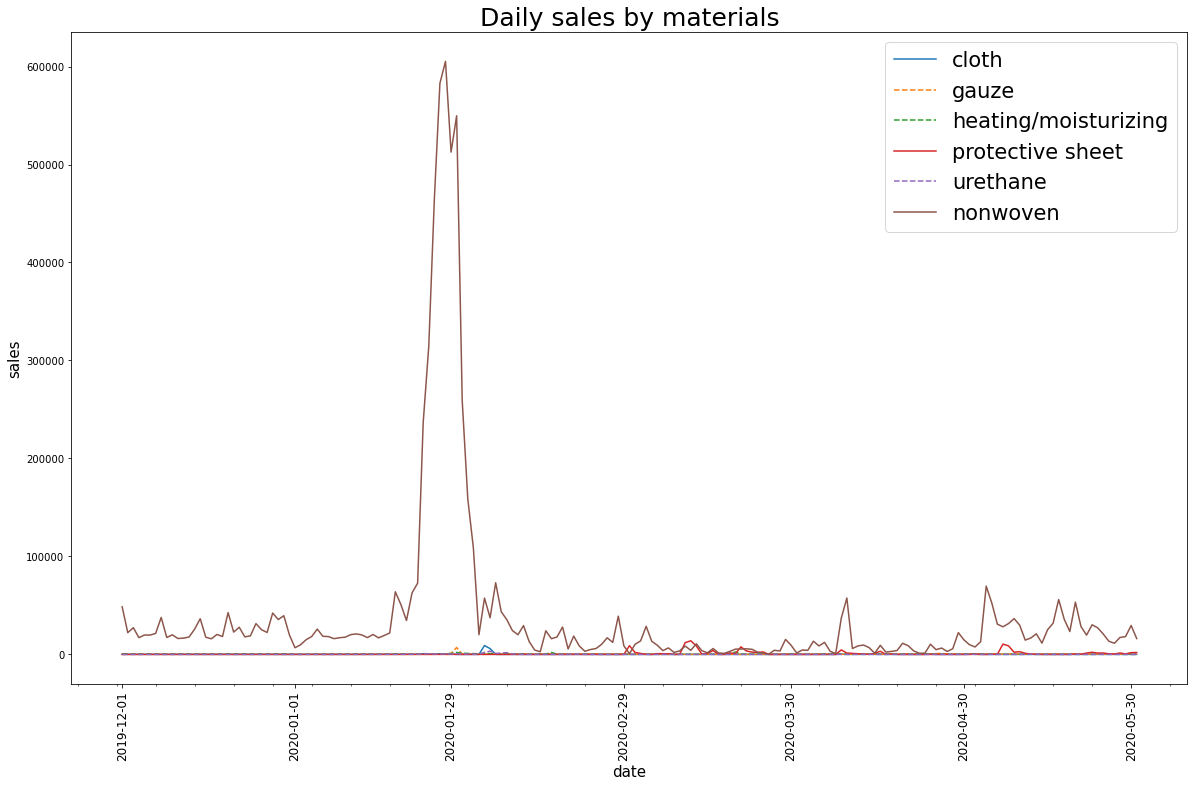

In [13]:
# Plotting data - all materials but "unwoven" because the difference is too big

fig, ax = plt.subplots(figsize=(20,12))

plt.plot(df_m['date'],df_m['cloth'], label = "cloth")
plt.plot(df_m['date'],df_m['gauze'], label = "gauze", linestyle='dashed')
plt.plot(df_m['date'],df_m['heating/moisturizing'], label = "heating/moisturizing", linestyle='dashed')
plt.plot(df_m['date'],df_m['protective sheet'], label = "protective sheet")
plt.plot(df_m['date'],df_m['urethane'], label = "urethane", linestyle='dashed')
plt.plot(df_m['date'],df_m['nonwoven'], label = "nonwoven")

plt.xlabel('date', size=15)
plt.ylabel('sales', size=15)
plt.title('Daily sales by materials', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 4 Daily Sale Shares by Materials

In [14]:
# Calculating shares of each material in daily sales
df_m = df_m.set_index('date')
df_m['total'] = df_m[list(df_m.columns)].sum(axis=1)
for x in df_m:
    df_m[x +'_share'] = df_m[x] / df_m['total']
df_m.reset_index(level=0, inplace=True)

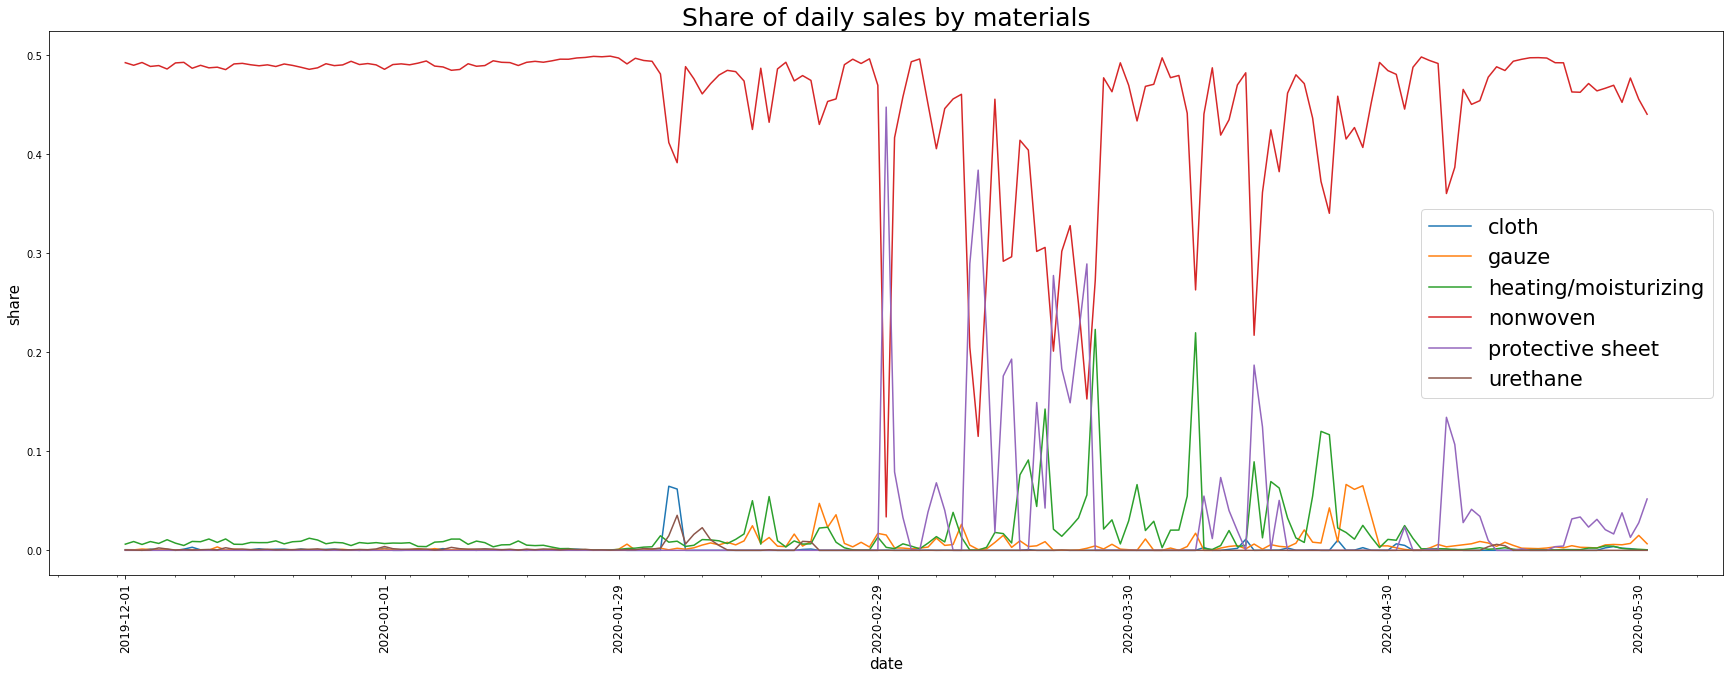

In [15]:
# Plotting sales data
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_m['date'],df_m['cloth_share'], label = "cloth")
plt.plot(df_m['date'],df_m['gauze_share'], label = "gauze")
plt.plot(df_m['date'],df_m['heating/moisturizing_share'], label = "heating/moisturizing")
plt.plot(df_m['date'],df_m['nonwoven_share'], label = "nonwoven")
plt.plot(df_m['date'],df_m['protective sheet_share'], label = "protective sheet")
plt.plot(df_m['date'],df_m['urethane_share'], label = "urethane")

plt.xlabel('date', size=15)
plt.ylabel('share', size=15)
plt.title('Share of daily sales by materials', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 4.1 ADF test and ACFs of Shares of Sales 
This part is just to see if there is change in fluctuation between before and after the panic buying. We did ADF test for each material, but all showed stationary. But after plotting ACFs for thetwo datasets, before and after the fluctuation started, the patterned changed. It might be used as statistical evidence showing a change in flucuation patterns.

In [16]:
# First, we find the index of the date the peak started. 
df_m = df_m.set_index('date')
col_name = ['2020-01-24']
for c in col_name:
    index_no = df_m.index.get_loc(c)
    print("Index of {} column in given dataframe is : {}".format(c, index_no))
df_m.reset_index(level=0, inplace=True)

Index of 2020-01-24 column in given dataframe is : 54


In [17]:
# Then, we seperate the data into two datasets. 
df_m_pre_spike = df_m.iloc[:54, :]
df_m_after_spike = df_m.iloc[54:, :]

In [18]:
# augmented Dickey–Fuller test (ADF) tests
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_m['nonwoven_share'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# A p-value of less than 5% means we can reject the null hypothesis that there is a unit root. Data is stationary.

ADF Statistic: -3.753421
p-value: 0.003421
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [19]:
result = adfuller(df_m['cloth_share'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# A p-value of less than 5% means we can reject the null hypothesis that there is a unit root. Data is stationary.

ADF Statistic: -5.503443
p-value: 0.000002
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [20]:
result = adfuller(df_m['gauze_share'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# A p-value of less than 5% means we can reject the null hypothesis that there is a unit root. Data is stationary.

ADF Statistic: -3.957390
p-value: 0.001651
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [21]:
result = adfuller(df_m['heating/moisturizing_share'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# A p-value of bigger than 5% means we can reject the null hypothesis that there is a unit root. Data is NOT stationary.

ADF Statistic: -1.966410
p-value: 0.301492
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


In [22]:
result = adfuller(df_m['urethane_share'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# A p-value of less than 5% means we can reject the null hypothesis that there is a unit root. Data is stationary.

ADF Statistic: -4.980711
p-value: 0.000024
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


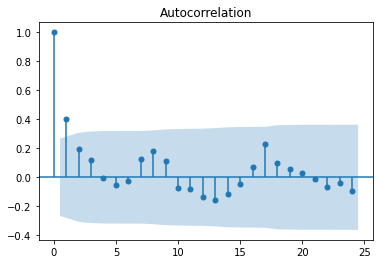

In [23]:
# However, from the ACFs of nonwoven facemasks sales shares before and after the panic buying, the patterns changed. 
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df_m_pre_spike['nonwoven_share'], lags=24)
plt.show()

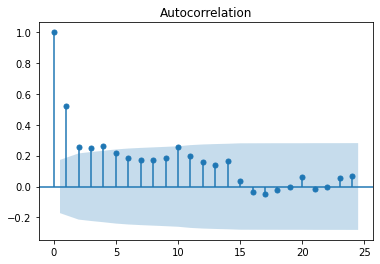

In [24]:
fig = tsaplots.plot_acf(df_m_after_spike['nonwoven_share'], lags=24)
plt.show()

# 5 Daily Sales by Size

In [25]:
# Create "size" variable
def size(row):
    if '温感' in row['商　品　名']or'小林薬'in row['商　品　名']or'蒸気'in row['商　品　名']or'潤い'in row['商　品　名']or'シート'in row['商　品　名']:
        val = 'other'
    elif '小顔'in row['商　品　名'] or '小久保'in row['商　品　名'] or'レギュラー'in row['商　品　名']or'ふつう'in row['商　品　名']:
        val = 'regular'
    elif '小'in row['商　品　名'] or 'スモール'in row['商　品　名']:
        val = 'smaller'
    elif 'アンパンマン'in row['商　品　名']or'こども'in row['商　品　名']or'キッズ'in row['商　品　名']or'バンダイ'in row['商　品　名']or'サンエイ'in row['商　品　名']or'ショウワ'in row['商　品　名']or'スケーター'in row['商　品　名']or'子供'in row['商　品　名']or'低学年'in row['商　品　名']or'園児'in row['商　品　名']or'ハピネット'in row['商　品　名']or'はじめて'in row['商　品　名']:
        val = 'kids'
    elif '大'in row['商　品　名']:
        val = 'bigger'
    else:
        val = 'regular'
    return val
df['size'] = df.apply(size, axis=1)

In [26]:
# Daily sales of each size 
df_s = df.groupby(['date', 'size'])['販売容量ALL'].sum()
df_s = df_s.unstack(level=0)
df_s = df_s.fillna(0)
df_s = df_s.T
df_s['total'] = df_s[list(df_s.columns)].sum(axis=1)
df_s.reset_index(level=0, inplace=True)

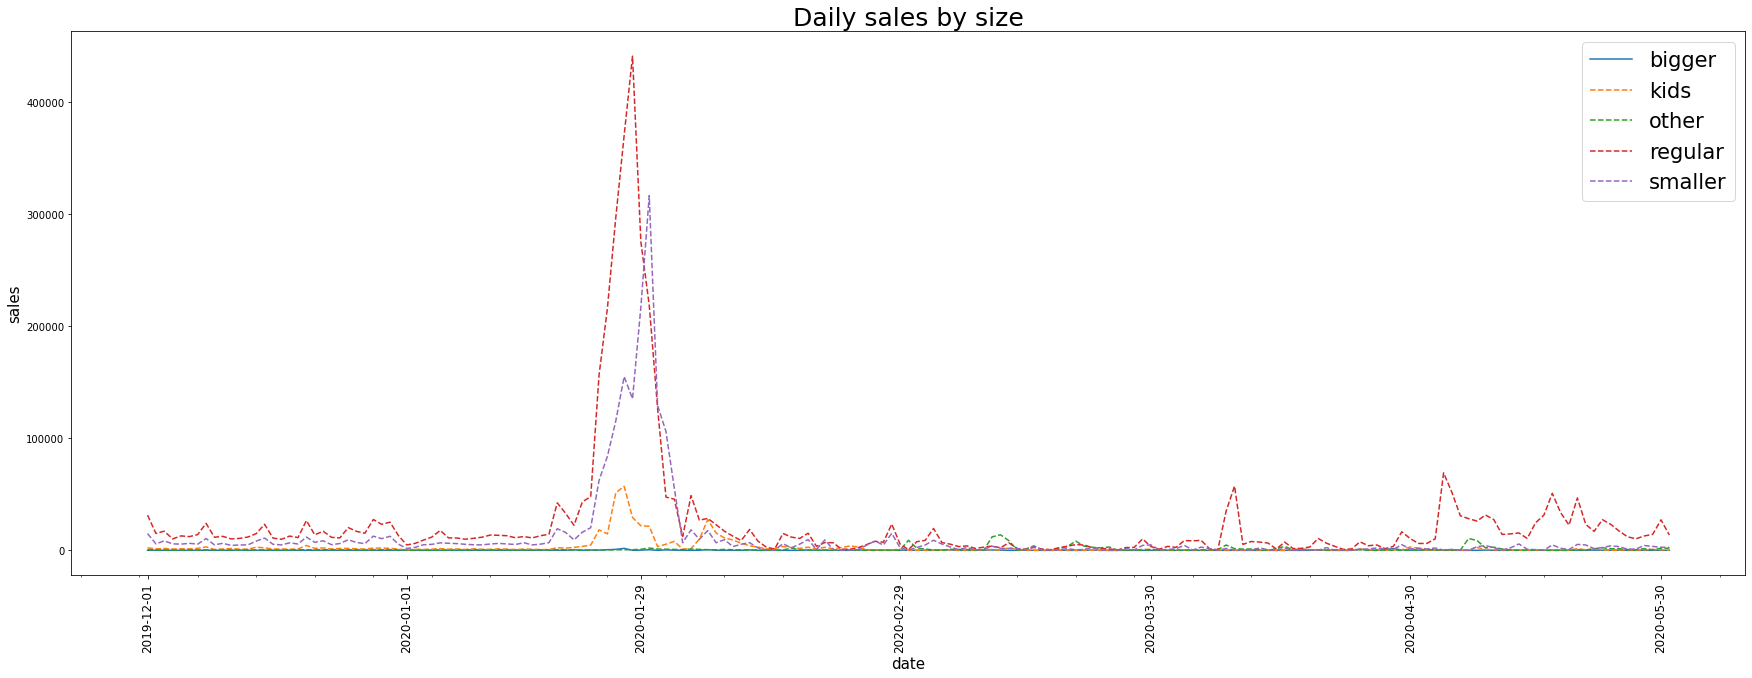

In [27]:
# Plotting data

fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_s['date'],df_s['bigger'], label = "bigger")
plt.plot(df_s['date'],df_s['kids'], label = "kids", linestyle='dashed')
plt.plot(df_s['date'],df_s['other'], label = "other", linestyle='dashed')
plt.plot(df_s['date'],df_s['regular'], label = "regular", linestyle='dashed')
plt.plot(df_s['date'],df_s['smaller'], label = "smaller", linestyle='dashed')

plt.xlabel('date', size=15)
plt.ylabel('sales', size=15)
plt.title('Daily sales by size', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 6 Daily Sale Shares by Size

In [28]:
# Calculating shares of each size in daily sales
df_s = df_s.set_index('date')
for x in df_s:
    df_s[x +'_share'] = df_s[x] / df_s['total']
df_s.reset_index(level=0, inplace=True)

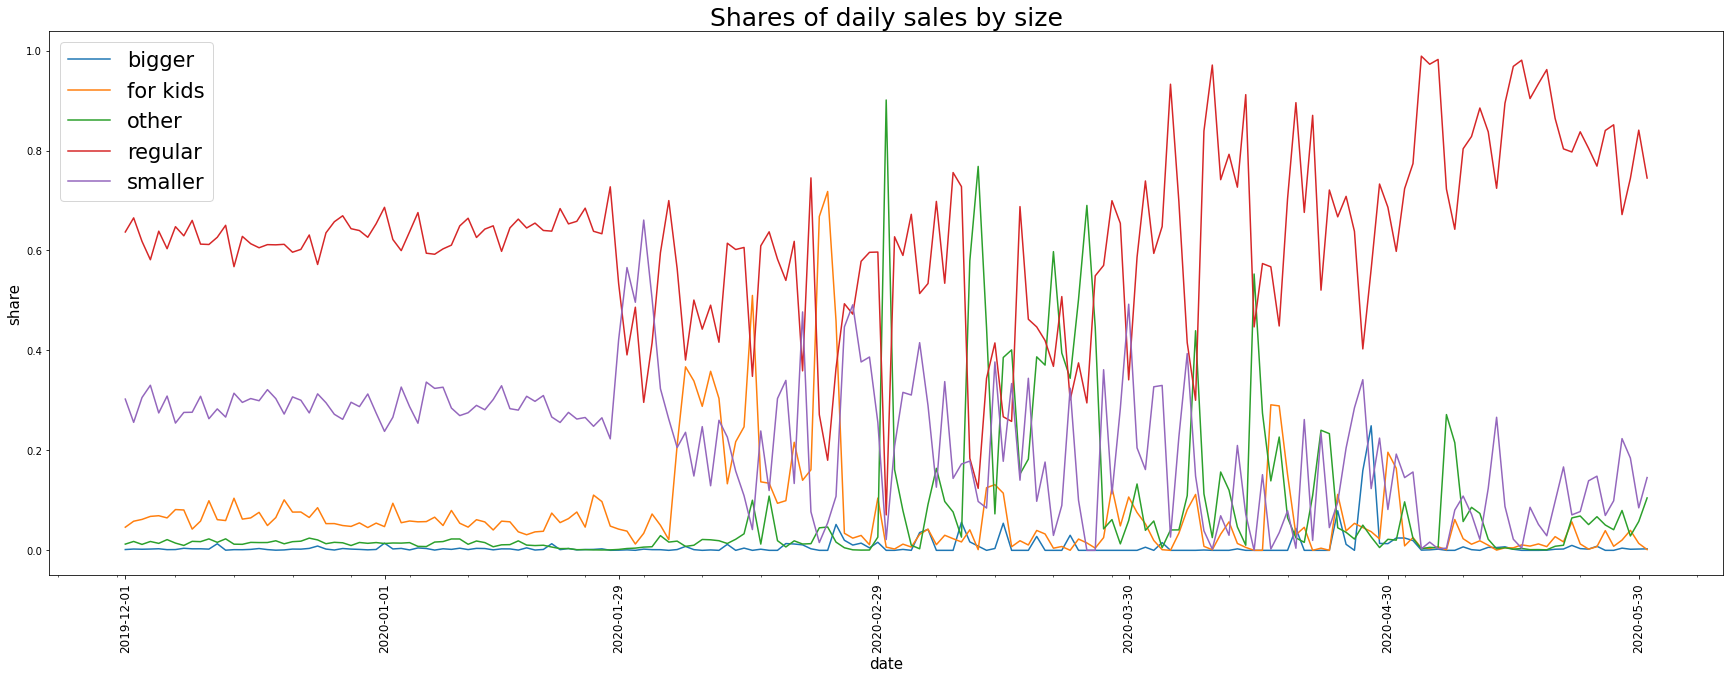

In [29]:
# Plotting sales data
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_s['date'],df_s['bigger_share'], label = "bigger")
plt.plot(df_s['date'],df_s['kids_share'], label = "for kids")
plt.plot(df_s['date'],df_s['other_share'], label = "other")
plt.plot(df_s['date'],df_s['regular_share'], label = "regular")
plt.plot(df_s['date'],df_s['smaller_share'], label = "smaller")

plt.xlabel('date', size=15)
plt.ylabel('share', size=15)
plt.title('Shares of daily sales by size', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})
fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 7 Daily Sales by Color

In [30]:
# Create "color" variable
def color(row):
    if '温感' in row['商　品　名']or'小林薬'in row['商　品　名']or'蒸気'in row['商　品　名']or'潤い'in row['商　品　名']or'シート'in row['商　品　名']:
        val = 'other'
    elif 'カラー'in row['商　品　名']or'色'in row['商　品　名']or'美フィット'in row['商　品　名']or'バンダイ'in row['商　品　名']or'サンエイ'in row['商　品　名']or'ショウワ'in row['商　品　名']or'スケーター'in row['商　品　名']or'クツワ'in row['商　品　名']or'薔薇'in row['商　品　名']or'ピンク'in row['商　品　名']or'グレー'in row['商　品　名']or'イエロー'in row['商　品　名']or'グリーン'in row['商　品　名']or'ラベンダー'in row['商　品　名']or'動物'in row['商　品　名']or'ハピネット'in row['商　品　名']or'香る'in row['商　品　名']or'アナ'in row['商　品　名']or'ラプンツェル'in row['商　品　名']or'ドナルド'in row['商　品　名']or'ベル'in row['商　品　名']or'ミッキー'in row['商　品　名']or'ミニ'in row['商　品　名']or'メイク'in row['商　品　名']:
        val = 'yes'
    else:
        val = 'no'
    return val
df['color'] = df.apply(color, axis=1)

In [31]:
# Daily sales of each color 
df_c = df.groupby(['date', 'color'])['販売容量ALL'].sum()
df_c = df_c.unstack(level=0)
df_c = df_c.fillna(0)
df_c = df_c.T
df_c['total'] = df_c[list(df_c.columns)].sum(axis=1)
df_c.reset_index(level=0, inplace=True)

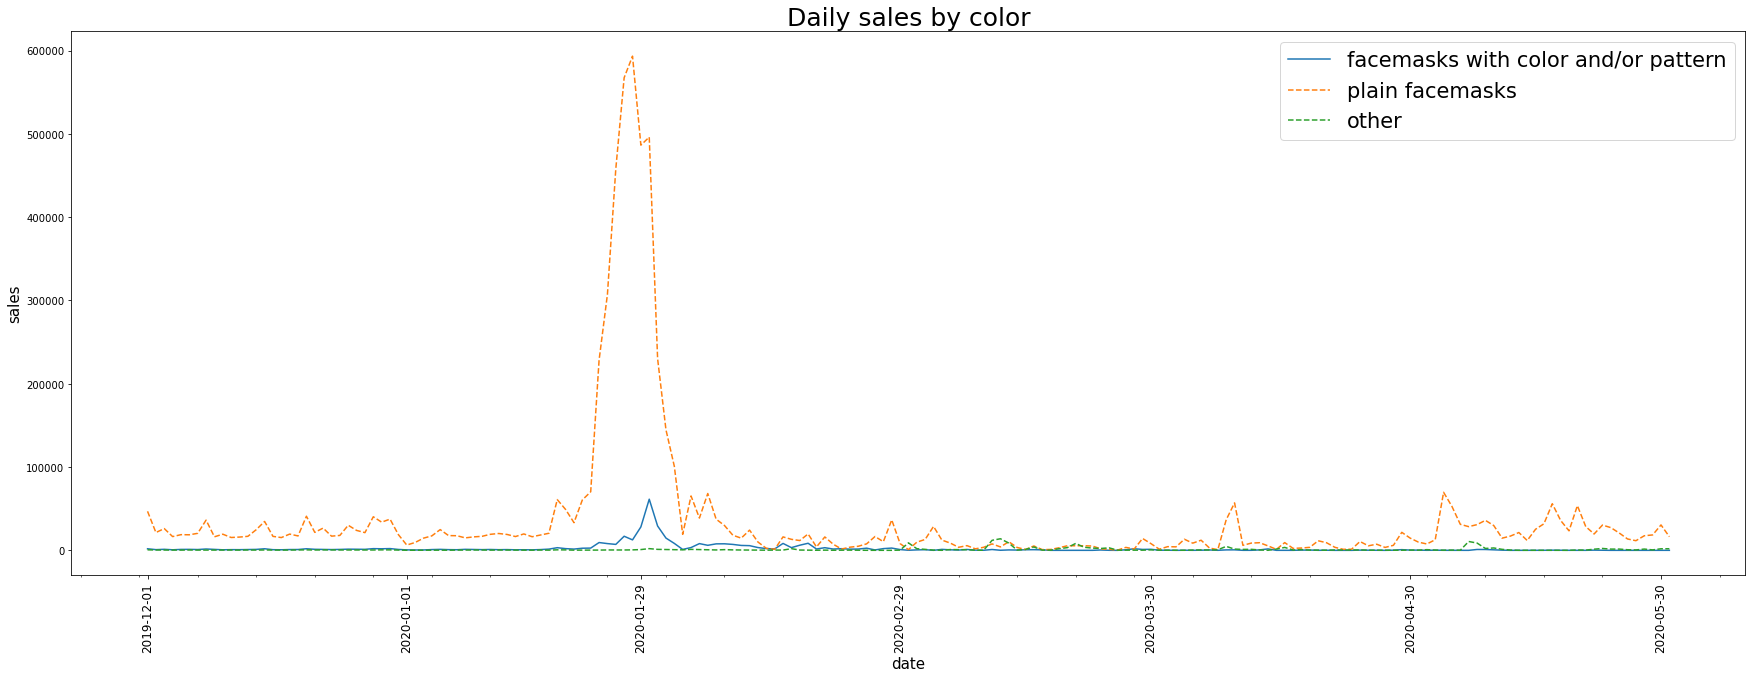

In [32]:
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_c['date'],df_c['yes'], label = "facemasks with color and/or pattern")
plt.plot(df_c['date'],df_c['no'], label = "plain facemasks", linestyle='dashed')
plt.plot(df_c['date'],df_c['other'], label = "other", linestyle='dashed')

plt.xlabel('date', size=15)
plt.ylabel('sales', size=15)
plt.title('Daily sales by color', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 8 Daily Sale Shares by Color

In [33]:
# Calculating shares of each material in daily sales
df_c = df_c.set_index('date')
for x in df_c:
    df_c[x +'_share'] = df_c[x] / df_c['total']
df_c.reset_index(level=0, inplace=True)

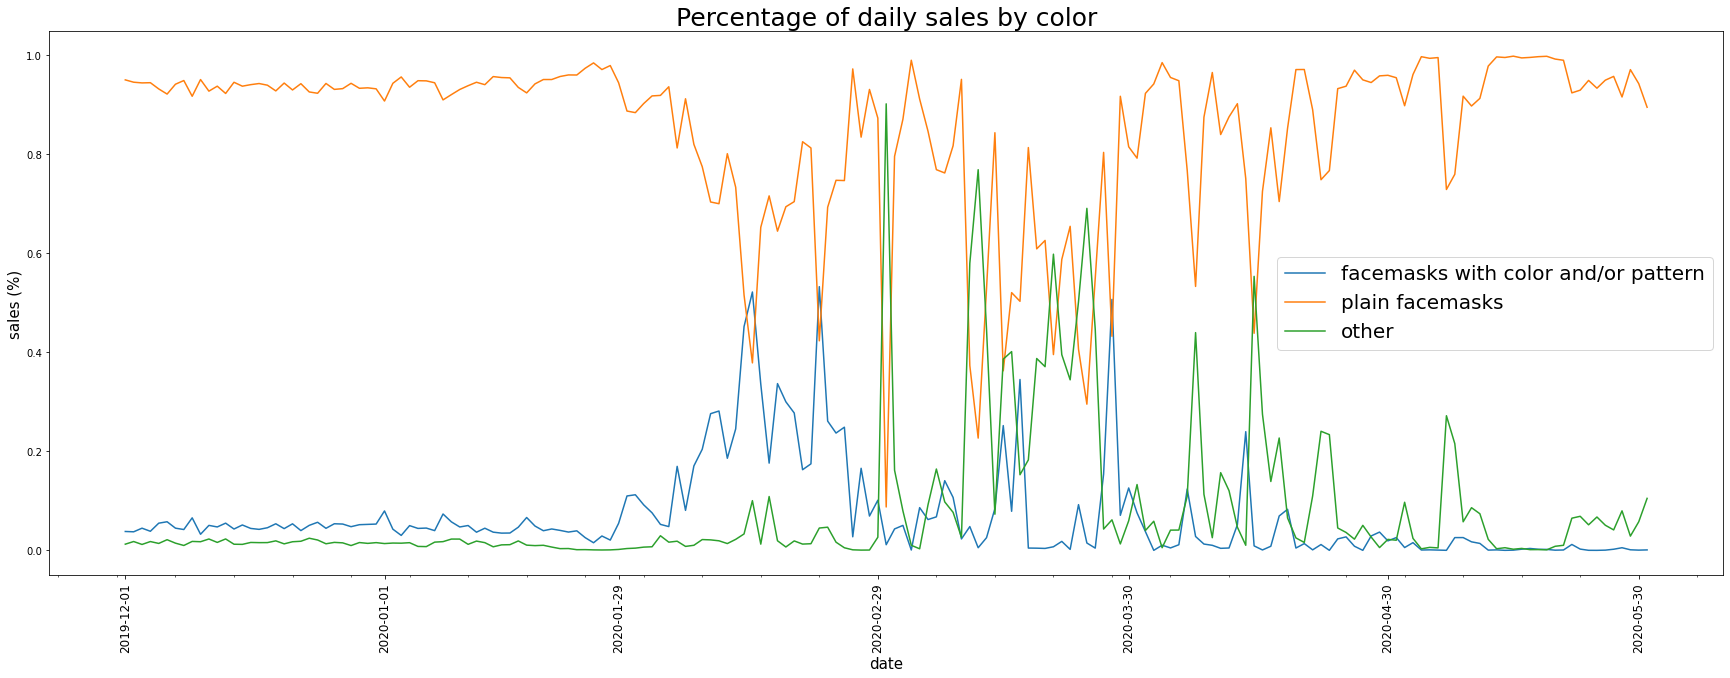

In [34]:
# Plotting sales data
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_c['date'],df_c['yes_share'], label = "facemasks with color and/or pattern")
plt.plot(df_c['date'],df_c['no_share'], label = "plain facemasks")
plt.plot(df_c['date'],df_c['other_share'], label = "other")

plt.xlabel('date', size=15)
plt.ylabel('sales (%)', size=15)
plt.title('Percentage of daily sales by color', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 20})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 9 Daily Sales by Brands and Products

In [35]:
# grouping sales by product name
df_temp4 = df.groupby('商　品　名').sum()['販売容量ALL'].reset_index()

# Sorting the dataframe in descending order
df_temp4.sort_values(by=['販売容量ALL'], inplace=True, ascending=False)

# Top 10 products by sales
df_temp4[:10]

,商 品 名,販売容量ALL
42,イオンＴＶ トップバリュ ウイルス飛沫、ＰＭ２．５対応不織布マスク ふつう ６５枚,1181700
44,イオンＴＶ トップバリュ ウイルス飛沫、ＰＭ２．５対応不織布マスク 小さめ ６５枚,595075
55,イオンＴＶ トップバリュ 不織布マスク ウイルス飛沫・ＰＭ２．５・花粉 ふつう 個包装 ４５枚,288765
367,米香 不織布マスク ふつう 徳用 ５０枚,264300
139,チャーム 超快適マスク プリーツ ふつう ３０枚,246180
217,ビーワイディー サージカルマスク ５０枚,172300
337,白元 快適ガード さわやかマスク レギュラー お徳用 ３０枚,168600
145,チャーム 超快適マスク プリーツ 小さめ ３０枚,138870
40,イオンＴＶ トップバリュ ウイルス飛沫、ＰＭ２．５対応不織布マスク こども用 ６５枚,138320
146,チャーム 超快適マスク プリーツ 小さめ ５０枚,131650


In [36]:
df_b = pd.DataFrame(df.groupby(['date', 'メーカー名'])['販売容量ALL'].sum())
df_b = df_b.unstack(level=0)
df_b = df_b.T
df_b['total'] = df_b[list(df_b.columns)].sum(axis=1)
df_b.reset_index(level=0, inplace=True)
df_b = df_b.fillna(0)

## 9.1 Top 10 Selling Products

In [37]:
# Here, in order to display Japanese in plots, we downloaded "ipaexg" font online and copy paste the ttf file into the following path.
import matplotlib
import matplotlib.font_manager as fm
print(matplotlib.matplotlib_fname())

C:\Users\alexx\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [39]:
# Here, we add ipaexg font to matplotlib.
os.chdir('C:\\Users\\alexx\\Documents\\thesis')
fm._rebuild()
fp = matplotlib.font_manager.FontProperties(fname=os.path.expanduser("ipaexg.ttf"))
plt.rcParams['font.family'] = fp.get_name()

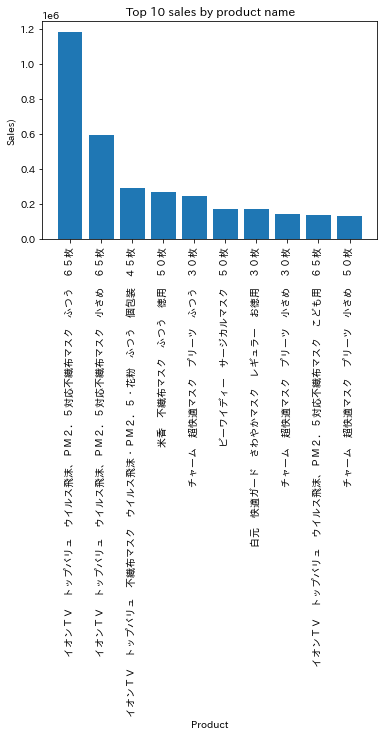

In [41]:
df_temp44 = df_temp4[:10]
plt.bar(df_temp44['商　品　名'],df_temp44['販売容量ALL'])
plt.xlabel("Product")
plt.ylabel("Sales)")
plt.title("Top 10 sales by product name")
plt.xticks(fontsize=10, rotation ='vertical')

plt.show()

## 9.2 Top 10 Selling Brands

In [43]:
# grouping sales by brand
df_temp5 = df.groupby('メーカー名').sum()['販売容量ALL'].reset_index()

# Sorting the dataframe in descending order
df_temp5.sort_values(by=['販売容量ALL'], inplace=True, ascending=False)

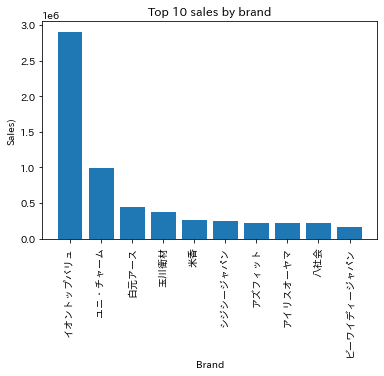

In [44]:
df_temp55 = df_temp5[:10]
plt.bar(df_temp55['メーカー名'],df_temp55['販売容量ALL'])
plt.xlabel("Brand")
plt.ylabel("Sales)")
plt.title("Top 10 sales by brand")
plt.xticks(fontsize=10, rotation ='vertical')
plt.show()

# 10 Revenue

In [45]:
# Summary of daily revenue data

# Sales of Regular Price 
df_temp11 = df.groupby('date').sum()['販売金額']
# Sales of Special Price 
df_temp22 = df.groupby('date').sum()['特売販売金額']
# Total sales
df["販売金額ALL"] = df["販売金額"] + df["特売販売金額"]
df_temp33 = df.groupby('date').sum()['販売金額ALL']
# Summary
df_r_and_s_rev = pd.concat([df_temp11, df_temp22, df_temp33], axis=1)
df_r_and_s_rev.describe().round()

,販売金額,特売販売金額,販売金額ALL
count,183.0,183.0,183.0
mean,886275.0,249114.0,1135389.0
std,1409098.0,605801.0,1898470.0
min,34044.0,1052.0,35096.0
25%,255853.0,35068.0,329752.0
50%,386533.0,103301.0,485492.0
75%,875559.0,183049.0,1084174.0
max,8308834.0,5293054.0,13601888.0


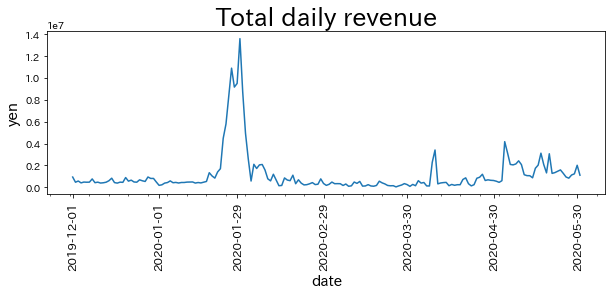

In [46]:
df_daily_revenue = df.groupby('date').sum()['販売金額ALL'].reset_index()

# Setting the figure size
fig, ax = plt.subplots(figsize=(10,3))

# Plotting sales data
plt.plot(df_daily_revenue['date'], df_daily_revenue['販売金額ALL'])
plt.xticks(rotation='vertical', size=12)
plt.xlabel('date', size=15)
plt.ylabel('yen', size=15)
plt.title('Total daily revenue', size=25)

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

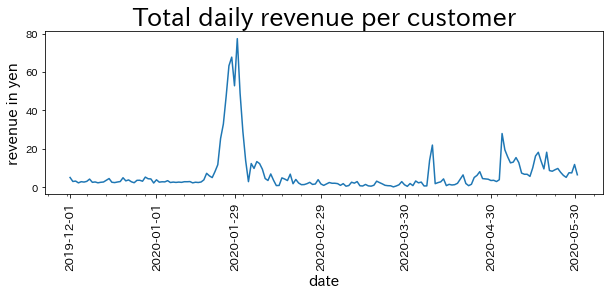

In [47]:
# daily revenue per customer
df_daily_revenue = pd.concat([df_daily_revenue, df_daily_customer['来店客数']], axis=1)
df_daily_revenue['revenue_pp'] = df_daily_revenue['販売金額ALL'] / df_daily_revenue['来店客数']

# Setting the figure size
fig, ax = plt.subplots(figsize=(10,3))

# Plotting sales data
plt.plot(df_daily_revenue['date'], df_daily_revenue['revenue_pp'])
plt.xticks(rotation='vertical', size=12)
plt.xlabel('date', size=15)
plt.ylabel('revenue in yen', size=15)
plt.title('Total daily revenue per customer', size=25)

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)
plt.show()

# 11 Daily Sales by Package Size

In [48]:
df_p = df[['date', '商　品　名', '平均価格','販売個数', '販売容量']].copy()
df_p = df_p.sort_values(by='date').reset_index(drop=True)
df_p = df_p[(df_p != 0).all(1)]

col1 = pd.DataFrame(df_p.groupby(['date','商　品　名'])['平均価格'].mean())
col2 = pd.DataFrame(df_p.groupby(['date','商　品　名'])['販売個数'].sum())
col3 = pd.DataFrame(df_p.groupby(['date','商　品　名'])['販売容量'].sum())
df_package_size = pd.concat([col1, col2, col3], axis=1)

df_package_size['#in'] = df_package_size['販売容量']/df_package_size['販売個数']
df_package_size['price_per_unit'] = df_package_size['平均価格'] / df_package_size['#in']

df_package_size.reset_index(inplace=True)
df_package_size.sort_values(by=['date'], inplace=True, ascending=False)

In [49]:
# 1. 0 < x <= 3
# 2. 3 < x <= 10
# 3. 10 < x <= 30
# 4. x > 30

def package_size(row):
    if row['#in']<=3:
        val = 'zero_three'
    elif row['#in']<=10:
        val = 'three_ten'
    elif row['#in']<=30:
        val = 'ten_thirty'
    else:
        val = 'over_thirty'
    return val
df_package_size['package_size'] = df_package_size.apply(package_size, axis=1)

## 11.1 Sold Units by Package Size

In [50]:
df_unit_by_ps = pd.DataFrame(df_package_size.groupby(['date','package_size'])['販売容量'].mean())
df_unit_by_ps = df_unit_by_ps.unstack(level=0).T.fillna(0)

df_unit_by_ps.reset_index(level=0, inplace=True)
df_unit_by_ps = df_unit_by_ps.drop('level_0', axis=1)

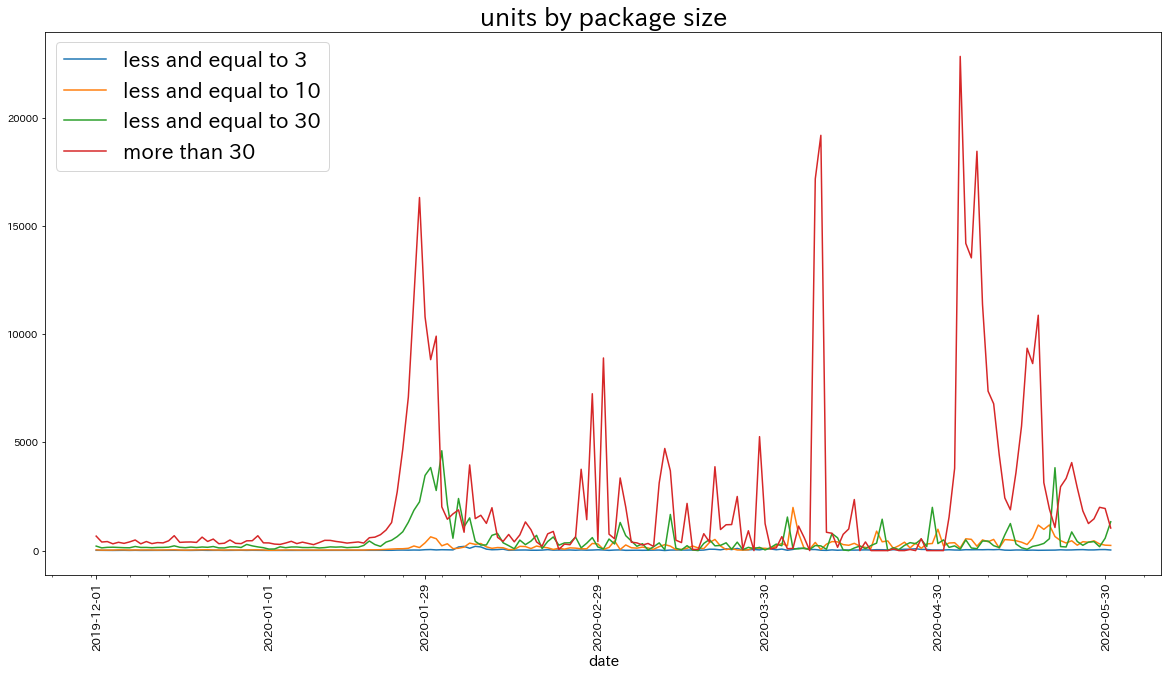

In [51]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(df_unit_by_ps['zero_three'], label = "less and equal to 3")
plt.plot(df_unit_by_ps['three_ten'], label = "less and equal to 10")
plt.plot(df_unit_by_ps['ten_thirty'], label = "less and equal to 30")
plt.plot(df_unit_by_ps['over_thirty'], label = "more than 30")

plt.xlabel('date', size=15)
plt.title('units by package size', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 11.2 Sold Packages by Package Size

In [52]:
df_package_by_ps = pd.DataFrame(df_package_size.groupby(['date','package_size'])['販売個数'].mean())
df_package_by_ps = df_package_by_ps.unstack(level=0).T.fillna(0)

df_package_by_ps.reset_index(level=0, inplace=True)
df_package_by_ps = df_package_by_ps.drop('level_0', axis=1)

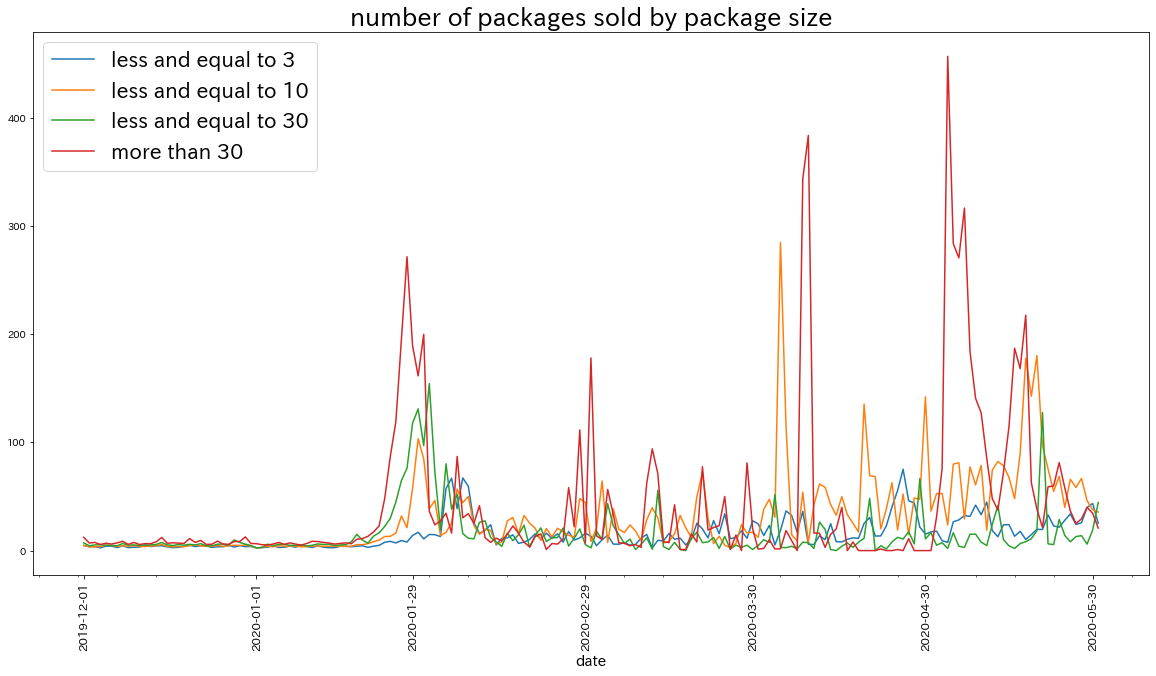

In [53]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(df_package_by_ps['zero_three'], label = "less and equal to 3")
plt.plot(df_package_by_ps['three_ten'], label = "less and equal to 10")
plt.plot(df_package_by_ps['ten_thirty'], label = "less and equal to 30")
plt.plot(df_package_by_ps['over_thirty'], label = "more than 30")

plt.xlabel('date', size=15)
plt.title('number of packages sold by package size', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

# 12 Price

In [54]:
df_p = pd.concat([col1, col2, col3], axis=1)
df_p['#in'] = df_p['販売容量']/df_p['販売個数']
df_p['price_per_unit'] = df_p['平均価格'] / df_p['#in']

df_p.reset_index(inplace=True)
df_p.sort_values(by=['date'], inplace=True, ascending=False)

## 12.1 Price per Unit in Materials

In [55]:
df_p_m = df_p
df_p_m['material'] = df_p_m.apply(material, axis=1)

df_p_m = df_p_m.groupby(['date', 'material'])['price_per_unit'].mean()
df_p_m = df_p_m.unstack(level=0).T

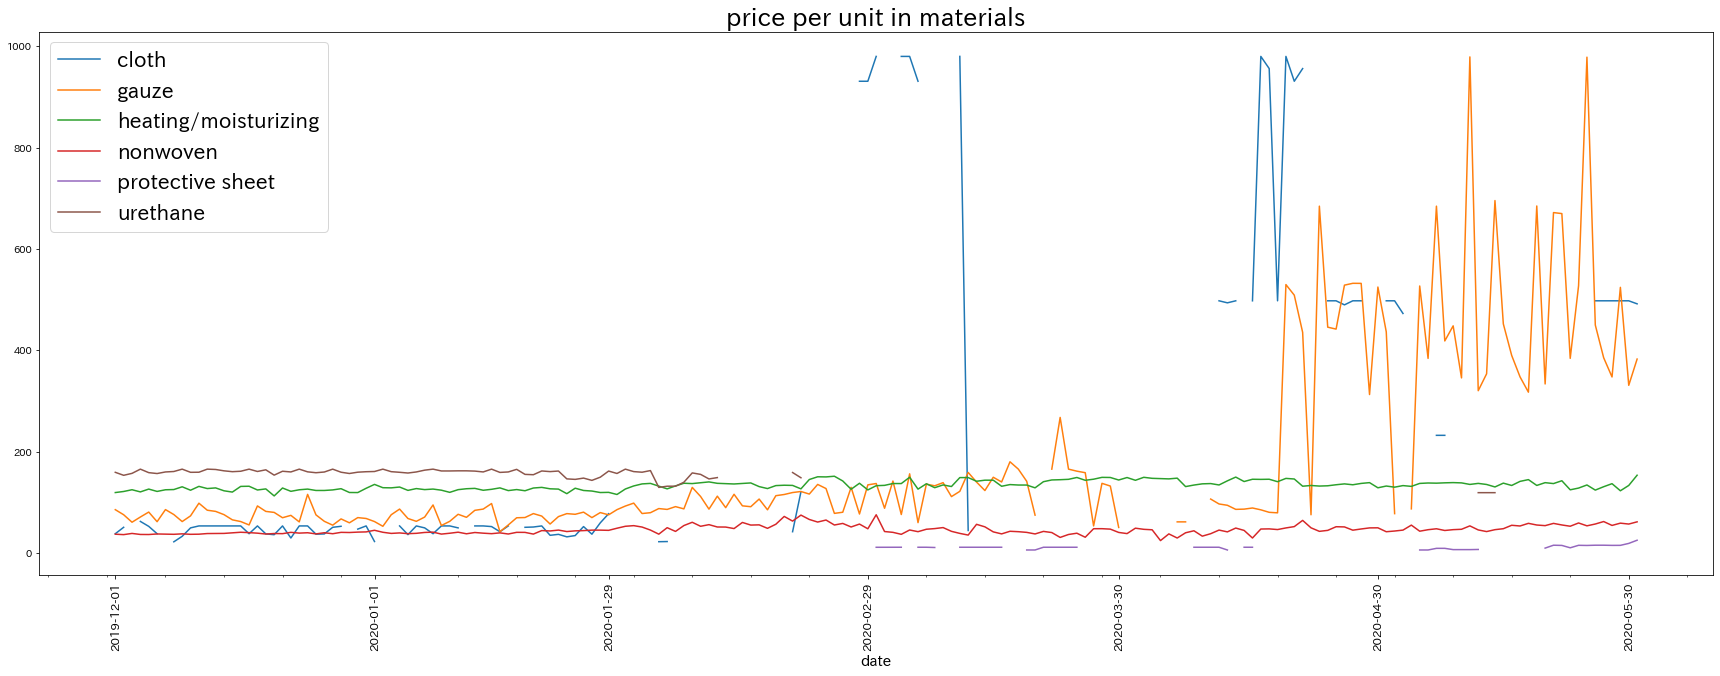

In [56]:
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_p_m['cloth'], label = "cloth")
plt.plot(df_p_m['gauze'], label = "gauze")
plt.plot(df_p_m['heating/moisturizing'], label = "heating/moisturizing")
plt.plot(df_p_m['nonwoven'], label = "nonwoven")
plt.plot(df_p_m['protective sheet'], label = "protective sheet")
plt.plot(df_p_m['urethane'], label = "urethane")

plt.xlabel('date', size=15)
plt.title('price per unit in materials', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 12.2 Price per Unit in Size

In [57]:
df_p_s = df_p
df_p_s['size'] = df_p_s.apply(size, axis=1)

df_p_s = df_p_s.groupby(['date', 'size'])['price_per_unit'].mean()
df_p_s = df_p_s.unstack(level=0).T

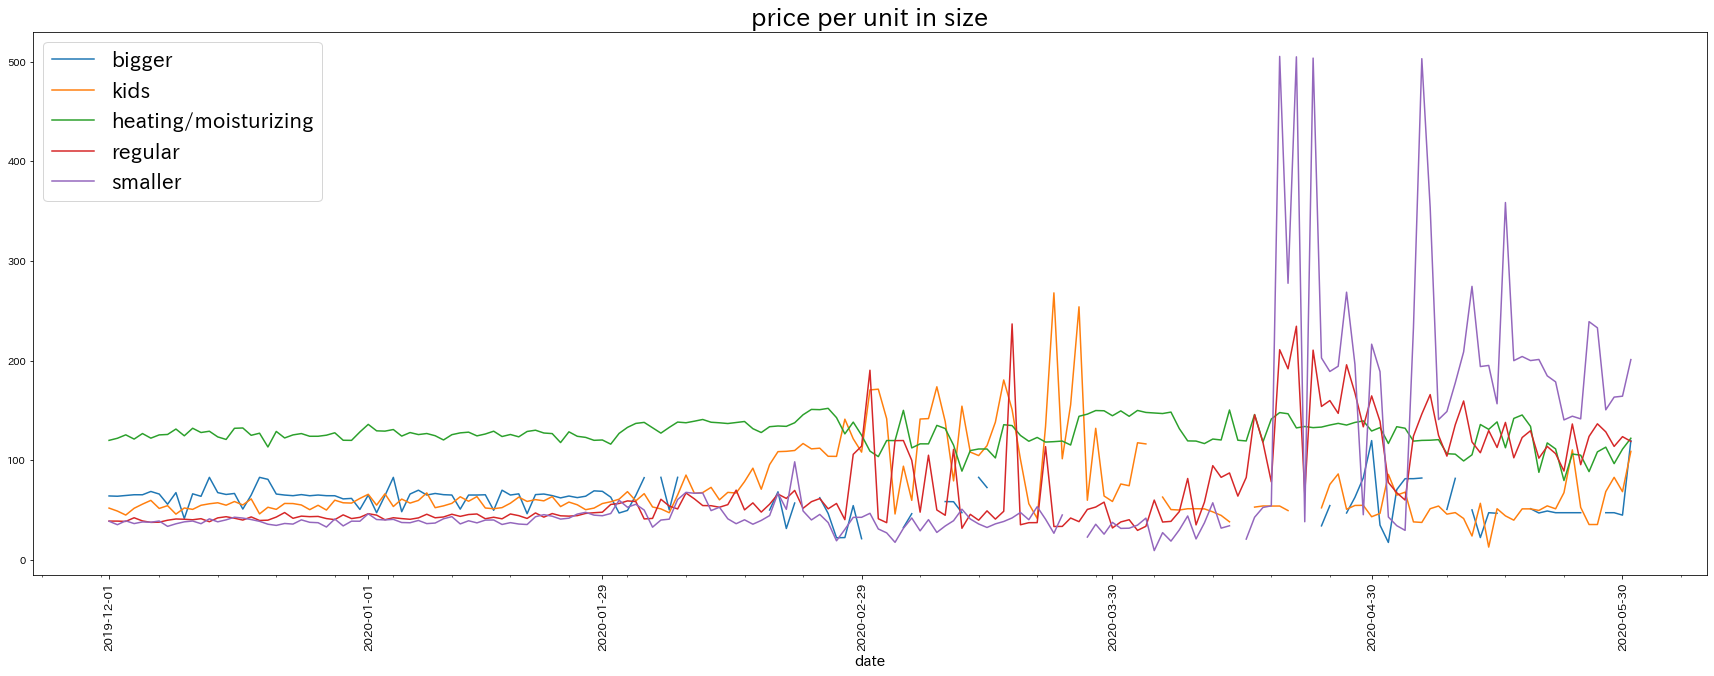

In [58]:
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_p_s['bigger'], label = "bigger")
plt.plot(df_p_s['kids'], label = "kids")
plt.plot(df_p_s['other'], label = "heating/moisturizing")
plt.plot(df_p_s['regular'], label = "regular")
plt.plot(df_p_s['smaller'], label = "smaller")

plt.xlabel('date', size=15)
plt.title('price per unit in size', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 12.3 Price per Unit in Color

In [59]:
df_p_c = df_p
df_p_c['color'] = df_p_c.apply(color, axis=1)

df_p_c = df_p_c.groupby(['date', 'color'])['price_per_unit'].mean()
df_p_c = df_p_c.unstack(level=0).T

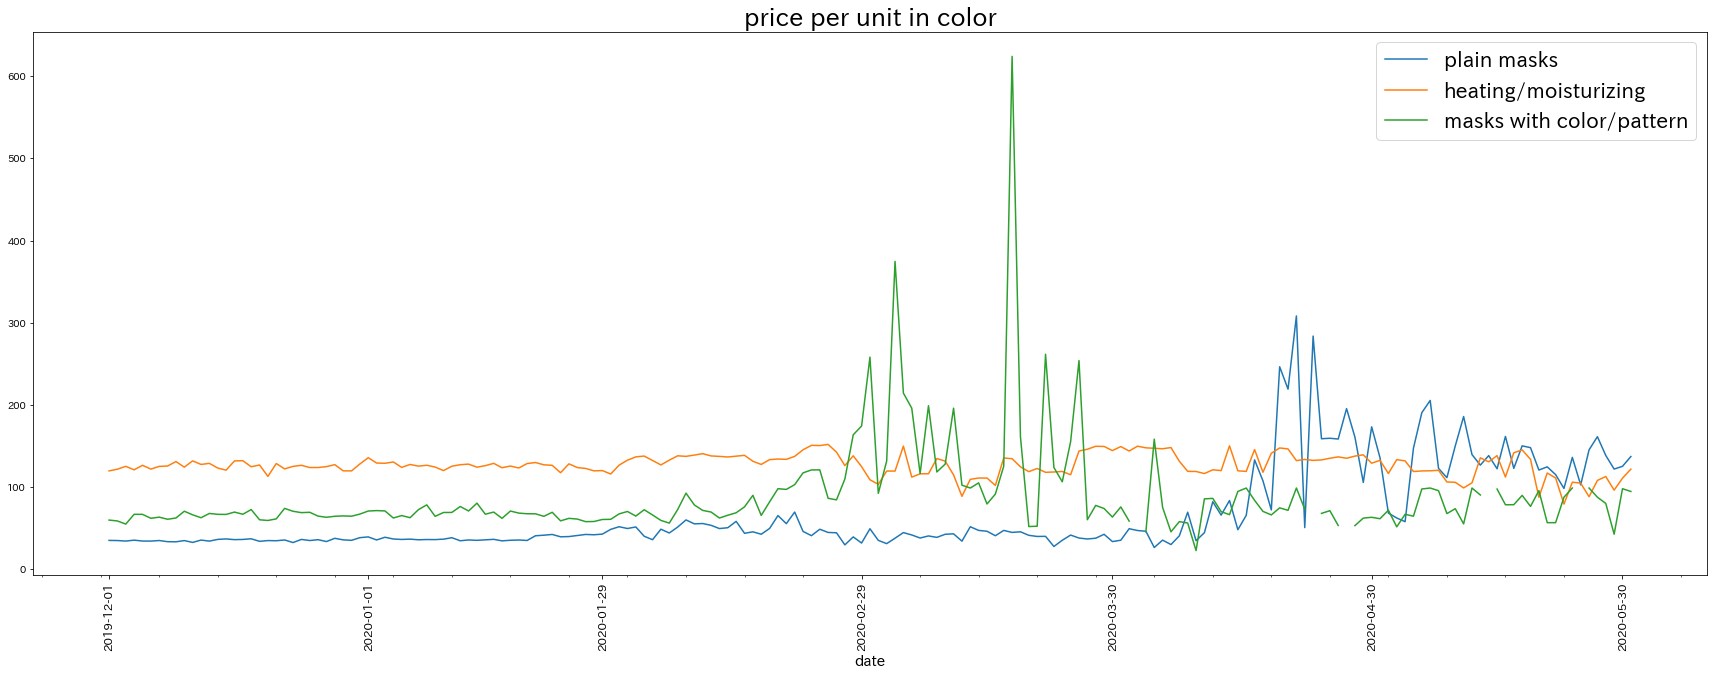

In [60]:
fig, ax = plt.subplots(figsize=(30,10))

plt.plot(df_p_c['no'], label = "plain masks")
plt.plot(df_p_c['other'], label = "heating/moisturizing")
plt.plot(df_p_c['yes'], label = "masks with color/pattern")

plt.xlabel('date', size=15)
plt.title('price per unit in color', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 21})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 12.4 Daily Average Price per Unit 

In [61]:
df_p = pd.DataFrame(df_p.groupby('date').mean()['price_per_unit'])

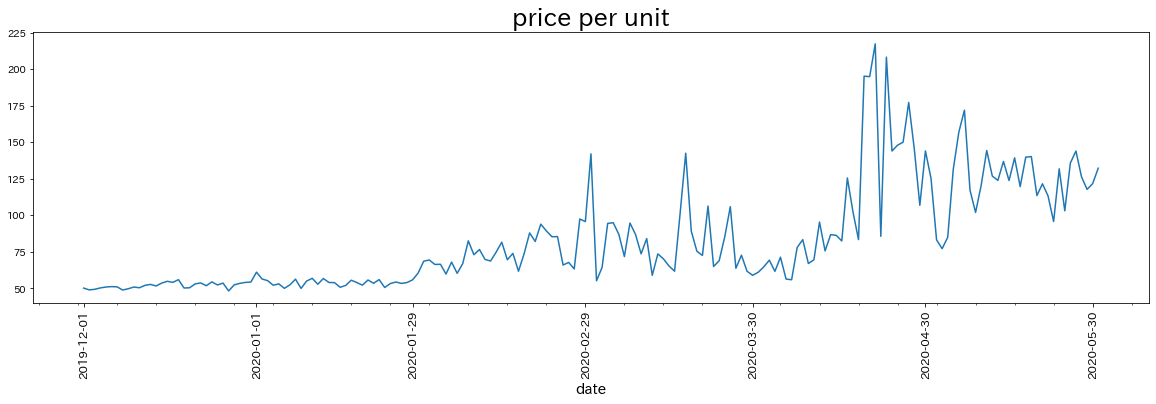

In [62]:
fig, ax = plt.subplots(figsize=(20,5))

plt.plot(df_p['price_per_unit'])

plt.xlabel('date', size=15)
plt.title('price per unit', size=25)
plt.xticks(fontsize=12, rotation ='vertical')

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 12.5 Price per Unit in Brands

In [63]:
df_p_brand = pd.DataFrame(df_package_size.groupby(['商　品　名','date'])['price_per_unit'].mean())
df_p_brand = df_p_brand.unstack(level=0)
df_p_brand = df_p_brand.T
df_p_brand.reset_index(level=0, inplace=True)
df_p_brand = df_p_brand.drop('level_0', axis=1).T

df_p_brand = df_p_brand[df_p_brand.columns.drop(list(df_p_brand.filter(regex='温感')))]
df_p_brand = df_p_brand[df_p_brand.columns.drop(list(df_p_brand.filter(regex='小林薬')))]
df_p_brand = df_p_brand[df_p_brand.columns.drop(list(df_p_brand.filter(regex='蒸気')))]
df_p_brand = df_p_brand[df_p_brand.columns.drop(list(df_p_brand.filter(regex='潤い')))]
df_p_brand = df_p_brand[df_p_brand.columns.drop(list(df_p_brand.filter(regex='快眠鼻呼吸')))]

In [64]:
df_p_mean_brand = pd.DataFrame(df_p_brand.mean(), columns=['mean_price'])
df_p_mean_brand.sort_values(by=['mean_price'], inplace=True, ascending=False)

In [65]:
df_p_mean_brand.head()

,mean_price
商 品 名,
ＤＲ．Ｃ医薬 ハイドロ銀チタン ソフトガーゼ立体マスク ＋３ かぜ・飛沫・花粉対策 ふつう １枚,970.384615
ＤＲ．Ｃ医薬 ハイドロ銀チタン ソフトガーゼ立体マスク ＋３ かぜ・飛沫・花粉対策 小さめ １枚,968.500000
ＩＲ研究所 コットン布マスク １枚,495.750000
ＤＲ．Ｃ医薬 花粉を水に変えるマスク ＋４ 花粉対策 小さめ ３枚,333.333333
ＤＲ．Ｃ医薬 花粉を水に変えるマスク ＋４ 花粉対策 ふつう ３枚,333.333333


In [66]:
df_p_mean_brand.tail()

,mean_price
商 品 名,
ピップ プリーツガードプラス 小さめ ６０枚,6.985354
イオンＴＶ トップバリュ ベストプライス 花粉・ほこり対応不織布マスク ふつう ６０枚,6.504487
イオンＴＶ トップバリュ ウイルス飛沫、ＰＭ２．５対応不織布マスク 小さめ ３０枚,6.453333
システムポリマ ３層オメガプリーツマスク ふつう ６５枚,6.150250
フロンティア 快適マスクシート マスク用取り替えシート お徳用 ５０枚,5.174286


In [67]:
# Here, we need to find where are top 5 most expensive facemasks in the dataset.

col_name = ['ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　ふつう　１枚',
            'ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　小さめ　１枚',
            'ＩＲ研究所　コットン布マスク　１枚',
            'ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　小さめ　３枚',
            'ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　ふつう　３枚'] 

for c in col_name:
    index_no = df_p_brand.columns.get_loc(c)
    print("Index of {} column in given dataframe is : {}".format(c, index_no))

Index of ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　ふつう　１枚 column in given dataframe is : 384
Index of ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　小さめ　１枚 column in given dataframe is : 385
Index of ＩＲ研究所　コットン布マスク　１枚 column in given dataframe is : 402
Index of ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　小さめ　３枚 column in given dataframe is : 389
Index of ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　ふつう　３枚 column in given dataframe is : 388


In [68]:
# Here, we need to find where are top 5 cheapest facemasks in the dataset.

col_name = ['ピップ　プリーツガードプラス　小さめ　６０枚',
            'イオンＴＶ　トップバリュ　ベストプライス　花粉・ほこり対応不織布マスク　ふつう　６０枚',
            'イオンＴＶ　トップバリュ　ウイルス飛沫、ＰＭ２．５対応不織布マスク　小さめ　３０枚',
            'システムポリマ　３層オメガプリーツマスク　ふつう　６５枚',
            'フロンティア　快適マスクシート　マスク用取り替えシート　お徳用　５０枚'] 

for c in col_name:
    index_no = df_p_brand.columns.get_loc(c)
    print("Index of {} column in given dataframe is : {}".format(c, index_no))

Index of ピップ　プリーツガードプラス　小さめ　６０枚 column in given dataframe is : 207
Index of イオンＴＶ　トップバリュ　ベストプライス　花粉・ほこり対応不織布マスク　ふつう　６０枚 column in given dataframe is : 38
Index of イオンＴＶ　トップバリュ　ウイルス飛沫、ＰＭ２．５対応不織布マスク　小さめ　３０枚 column in given dataframe is : 32
Index of システムポリマ　３層オメガプリーツマスク　ふつう　６５枚 column in given dataframe is : 73
Index of フロンティア　快適マスクシート　マスク用取り替えシート　お徳用　５０枚 column in given dataframe is : 208


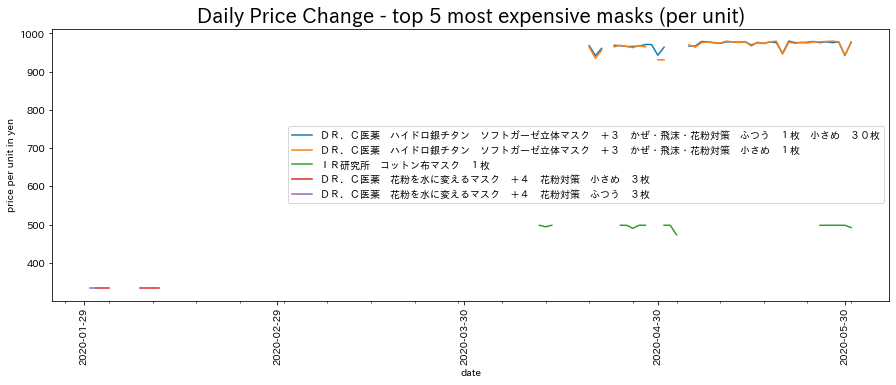

In [74]:
# Here, we plot top 5 most expensive facemasks.
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(df_p_brand.iloc[:, [384]], label = 'ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　ふつう　１枚　小さめ　３０枚')
plt.plot(df_p_brand.iloc[:, [385]], label = 'ＤＲ．Ｃ医薬　ハイドロ銀チタン　ソフトガーゼ立体マスク　＋３　かぜ・飛沫・花粉対策　小さめ　１枚')
plt.plot(df_p_brand.iloc[:, [402]], label = 'ＩＲ研究所　コットン布マスク　１枚')
plt.plot(df_p_brand.iloc[:, [389]], label = 'ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　小さめ　３枚')
plt.plot(df_p_brand.iloc[:, [388]], label = 'ＤＲ．Ｃ医薬　花粉を水に変えるマスク　＋４　花粉対策　ふつう　３枚')

plt.xlabel('date', size=10)
plt.ylabel('price per unit in yen', size=10)
plt.title('Daily Price Change - top 5 most expensive masks (per unit)', size=20)
plt.xticks(fontsize=10, rotation ='vertical')
plt.yticks(fontsize=10)
plt.legend(prop={'size': 10})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

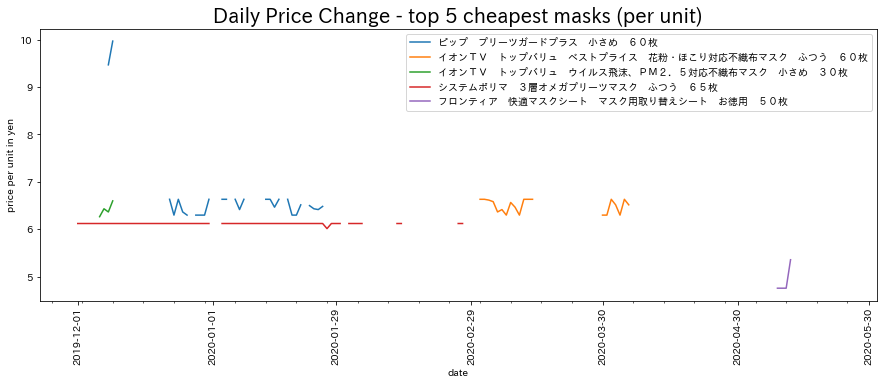

In [76]:
# Here, we plot top 5 cheapest facemasks.
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(df_p_brand.iloc[:, [207]], label = 'ピップ　プリーツガードプラス　小さめ　６０枚')
plt.plot(df_p_brand.iloc[:, [38]], label = 'イオンＴＶ　トップバリュ　ベストプライス　花粉・ほこり対応不織布マスク　ふつう　６０枚')
plt.plot(df_p_brand.iloc[:, [32]], label = 'イオンＴＶ　トップバリュ　ウイルス飛沫、ＰＭ２．５対応不織布マスク　小さめ　３０枚')
plt.plot(df_p_brand.iloc[:, [73]], label = 'システムポリマ　３層オメガプリーツマスク　ふつう　６５枚')
plt.plot(df_p_brand.iloc[:, [208]], label = 'フロンティア　快適マスクシート　マスク用取り替えシート　お徳用　５０枚')

plt.xlabel('date', size=10)
plt.ylabel('price per unit in yen', size=10)
plt.title('Daily Price Change - top 5 cheapest masks (per unit)', size=20)
plt.xticks(fontsize=10, rotation ='vertical')
plt.yticks(fontsize=10)
plt.legend(prop={'size': 10})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()